# Lab 10

# __Centrality measures__ 

In [3]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import operator
from scipy.spatial import distance

In [4]:
import pydot 

# Random walk on graphs and stationary distribution

Random walk on graphs:
1. Given an undirected graph and a starting node $v$, select a neighbour of $v$ (uniformly) at random  
2. Move to the selected neighbour and repeat the same process (untill a termination condition is verified)
3. The random sequence of nodes selected in this way is a random walk on the graph

![random_walk_on_graph](https://i.stack.imgur.com/rISDS.gif)

__Simple random walk on graph__

Given an undirected graph $G = (V, E)$, with $n = |V|$ and
$m =|E|$, a simple random walk is a stochastic process that starts from a given vertex, and then visits one of its neighbors that is chosen uniformly at random.

The simple random walk on $G$ is defined by the following transition matrix $P = (p_{i j})$:


$$ p_{i j} = 
\begin{cases}
\frac{1}{\mathrm{deg}(i)},  \text{ if } j \text{ is a neighbour of } i, \text{ i.e. } (i, j) \in E \\
0, \text{ otherwise}
\end{cases}$$

where $\mathrm{deg}(u)$ is the degree of the node $u$.

The sequence of vertices $v_0, v_1, v_2, \ldots , v_k,\ldots$ selected in this way is a simple random walk on $G$.


At each step $k$, we have a random variable $X_k$ taking values on $V$.

Hence, the random sequence $X_0, X_1, X_2, \ldots, X_k , \ldots$ is a discrete time stochastic process defined on the state space $V$.

Notice that the transition probabilities do not depend on “time” $k$, hence

#### The random sequence of vertices visited by the walk, $X_0, X_1, \ldots , X_n, \ldots$ is a __Markov chain__ with state space __V__ and transition probability matrix $P = (p_{ij})_{i,j\in V}$ 

* Let $D$ be the diagonal matrix with $(D)_{i,i} = \mathrm{deg}(i)$, 
* Let $D^{-1}$ be the inverse matrix of $D$, i.e. $(D^{-1})_{i,i} = \frac{1}{\mathrm{deg}(i)}$, 
* and let $A$ be the adjacency matrix of $G$. 

Then $P = D^{-1} A$

Let $\pi_k$ be the row vector containing the probability distribution of $X_k$ , 


$$\pi_k(i) = \mathbb{P}(X_k = i), \quad i \in V$$


The rule of the walk is expressed by the simple equation

### $$\pi_{k+1} = \pi_k P$$ 

__Stationary distribution__

A stationary distribution of a Markov chain with transition matrix $P$ is a probability distribution $\pi$, such that $\pi = \pi P$

A Markov chain has a unique stationary distribution if
1. it is irreducible 
    * the underlying graph is strongly connected
2. it is aperiodic
    * for random walks, the greatest common divisor of the length of the cycles in the underlying graph is one e.g., if the graph is bipartite it is not aperiodic

__Theorem__
Given an irreducible and aperiodic graph with a set of nodes $V$ and a set $E$ of edges, as $k \to \infty$ the fraction of time when the random walker visited node $v$ converges to the stationary distribution, which is proportional to the degree of $v$:

$$\pi(v) = \frac{\mathrm{deg}(v)}{2|E|} $$

So if the graph is connected and aperiodic the $\pi_k$ sequence defined by $\pi_{k} = \pi_{k-1} P$ concerges to a stationary distribution $\pi$

# __Exercise 1a__

Write a function that that has two inputs: 
* a graph $G = (V, E)$,
* and the number of iterations $k$. By default let $k$ be 150.

The function should return a list containing the L-1 distance of the vector $\pi_j$ and $\pi$ for $j=0,1,\ldots,k$.

Help:

0. If the graph is bipartite then it should print out that 'The graph is bipartite'. Use [nx.is_bipartite](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.basic.is_bipartite.html#networkx.algorithms.bipartite.basic.is_bipartite)
1. First get the adjacency matrix of $G$ ([nx.to_numpy_array](https://networkx.github.io/documentation/latest/reference/generated/networkx.convert_matrix.to_numpy_array.html) or [nx.to_numpy_matrix](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.convert_matrix.to_numpy_matrix.html))
2. Calculate the $D^{-1}$ matrix. Use [np.diag](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html).
3. Calculate the transition probability matrix $P = D^{-1} A$. Use [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) for matrix multiplication.
4. Initialize $\pi_0$ as a numpy array of length $n = |V|$ which is zero except the first coordinate, i.e. $\pi_0 = (1,0,0, \ldots, 0)$. Use the [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function. 
5. Calculate $\pi$. Recall that $\pi(v) = \frac{\mathrm{deg}(v)}{2\cdot|E|} $.
6. Initialize an empty list, called ```dist```, that will contain the L-1 distances between $\pi_j$ and $\pi$ for $j=1,\ldots,k$
7. For $j$ in ```range(k)```:
    1. calculate the L1 distance between $\pi_j$ and $\pi$ and append it to the ```dist``` list. Use [distance.minkowski](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html) with correct parameter settings to calculate the L-1 distance.
    2. Calculate $\pi_{j+1}$. Recall that $\pi_{j+1} = \pi_j \cdot P$. Again use the [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function.
8. Return the ```dist``` list

__This should take you about 15-18 minutes!__

# __Exercise 1b__ 

1. Create a 4-regular random graph on 225 nodes. Use [nx.random_regular_graph](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.random_graphs.random_regular_graph.html),
2. Plot the output of the function of __Exercise 1a__ applied on this 4-regular graph, and set the label to be '4-regular',
3. Create a periodic grid graph of $15 \times 15$ nodes. Use [nx.grid_2d_graph(15, 15, periodic=True)],
4. Plot the output of the function of __Exercise 1a__ applied on this grid graph, and set the label to be 'grid',
5. Show the labels with ```plt.legend()```

# __PageRank__

In [1]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation
from IPython.display import HTML
import pandas as pd

__PageRank__

PageRank was introduced by the founders of Google to rank websites in search results. PageRank is a way of measuring the importance of website pages. According to Google:


_PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites_

__PageRank random walk__

The following figures are from the slides of the course called Introduction to Data Science I held by Roland Molontay.

__Simple random walk on graphs:__

![random_walk_transition_prob_matrix](http://math.bme.hu/~marcessz/notebooks/random_walk_transition_prob.PNG)

![sink nodes](http://math.bme.hu/~marcessz/notebooks/sink_nodes.PNG)

The __PageRank__ is a modified random walk:
1. It handles the sink nodes
2. Ensures irreducibility with random jumps

![sink nodes_2](http://math.bme.hu/~marcessz/notebooks/sink_nodes_2.PNG)

![pagerank](http://math.bme.hu/~marcessz/notebooks/page_rank.PNG) 

* PageRank of each node is the corresponding entry in the stationary
distribution of PageRank random walk (driven by P’’ matrix)
* It is the visit frequency of the PageRank random walk on the web graph

# __Exercise 2__

Implement a function called ```google_matrix```, which has two parameters: a graph, and an $\alpha$ constant (called damping factor). This function should return the $P''$ transition probability matrix, that is calculated as follows:
1. First modify the adjacency matrix of the graph. If there exist somes node with no outlinks (dangling/sink nodes), then it means that the row of these nodes contains only zeros in the $A$ adjacency matrix. Calculate $A'$, which is the same as $A$ except for the rows of the dangling nodes: in the rows of the dangling nodes replace the zeros to ones. <br> 

2. Normalize the rows of $A'$, i.e. calculate $P' := D^{-1}A'$, where $(D^{-1})_{i,i} = 1/\sum_{j=1}^n {A'}_{i, j}$, and $n$ is the size (number of nodes) of the graph.  ($\sum_{j=1}^n {A'}_{i, j}$ is the sum of the $i$th row in $A'$). 

3. Calculate and return $P''$:
$$P'' = \alpha P' + (1-\alpha) \frac{1}{n} E $$
where $E$ is a matrix of all ones.  

Built-in function that you will have to use:
* [nx.to_numpy_array](https://networkx.github.io/documentation/latest/reference/generated/networkx.convert_matrix.to_numpy_array.html): Returns the adjacency matrix as a numpy array
* [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) or array.sum(), where array is a numpy array: Sum of array elements over a given axis. Axis=1: rows, axis=0: columns.
* [np.diag](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html): construct a diagonal matrix.
* [np.dot](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.dot.html): matrix multiplication. 
* [np.where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html): See example below. 
* [np.ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html): return an array of given shape filled with ones.

__This should take you about 20 minutes!__

Hints are in the comments of the function.

__How np.where works:__

In [2]:
a = np.array([10,2,0,3,5,0])

If we want to get the indices of the elements of the ```a``` array that equal to 0, we can do the following:

In [3]:
np.where(a == 0)

(array([2, 5], dtype=int64),)

It returns a tuple, so actualy we need the first element of this tuple:

In [4]:
np.where(a == 0)[0]

array([2, 5], dtype=int64)

### __You can test your function on the following graph:__  
__Compare the output of your function to the output of [nx.google_matrix](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.google_matrix.html)__

In [6]:
di_g = nx.DiGraph()
di_g.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])
dpos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
        5: [0.5,  0.5], 6: [0.8,  0.5], 7: [0.22, 0.3], 8: [0.30, 0.27],
        9: [0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]}

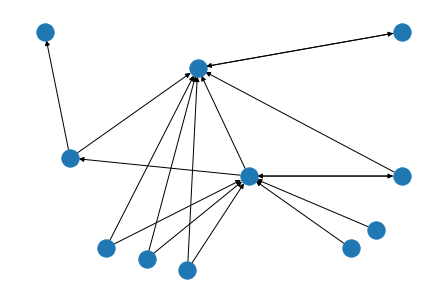

In [7]:
nx.draw(di_g, dpos)

# __Exercise 3__ 

Implement a function that calculates the pagerank of the nodes of a given graph using the power method:

__Algorithm:__

The function should have 3 input parameters: ```graph, alpha=.85, iteration=100```.
1. Initialize an $x$ pagerank vector (of lenght $n$=number of nodes) as $x=[\frac{1}{n}, \ldots, \frac{1}{n}]$. <br> Use [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html).
2. Calculate the $P''$ transition matrix with the help of ```google_matrix``` function.
3. For i = 1, 2, $\ldots$, `iteration`:
    * $x = x\cdot P''$ <br> Use [np.dot](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.dot.html) for the multiplication.
 

Calculate the pagerank of the ```di_g``` directed graph, and compare your results to the output of [nx.pagerank(di_g)](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html). You can also compare the runtime of your function and the built-in networkx function (hint: https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python).



---

---

---

---

# __Queueing theory__ 

![queueing](https://www.scienceabc.com/wp-content/uploads/2017/11/Queuing-Theory.jpg)

# __M/M/1 queue__

## __Notations__

* $\lambda$ (__arrival rate__): the average arrival rate of customers (number of arrivals to the system per unit time)
* $\mu$ (__service rate__): the average number of customers served per unit time 

Let $A_0, A_1, A_2, \ldots$ be i.i.d. exponential random variables with expected value $\frac{1}{\lambda}$, i.e. $A_i \sim \mathrm{Exp}\left(\lambda\right)$

Let $B_0, B_1, B_2, \ldots$ i.i.d. exponential random variables with expected value $\frac{1}{\mu}$, i.e. $B_i \sim \mathrm{Exp}\left(\mu\right)$

$A_i$ is the time elapsed between the arrival time of the $i$th and $(i+1)$th customer:

The first customer arrives at $t=0$, the second arrives at $t=A_0$, the third arrives at $t=A_0 + A_1$, the fourth arrives at $t= A_0 + A_1 + A_2$, and so on. 


$B_i$ is the serving time of the $i$th customer. 

$H_0$ is the length of the first busy period, i.e. until $t=H_0$ the server is busy serving the line of customers, but after $H_0$ the server is free until the next customer arrives.

![queue](http://math.bme.hu/~marcessz/notebooks/queueing.png)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# __Exercice 4a__ 

Implement a function that has three input parameters: ```service_rate```, ```arrival_rate```, and ```number_of_customers```. The function should return three arrays, called ```arrivals```, ```start_time```, ```finish_time```, where
* ```arrivals``` contains the time of arrivals of the customers, i.e. $\mathrm{arrivals} = \mathrm{np.array}([0, A_1, A_2, \ldots, A_{number\_of\_customers}])$
* ```start_time[i]``` is the time when the server started to serve the $i$th customer
* ```finish_time[i]``` is the time when the server finished the serving of the $i$th customer. (```finish_time[i] - start_time[i]``` $= B_i$) <br> Note that the elements of ```finish_time``` are denoted with white triangles in the figure.

__Hint__:
1. First calculate the ```arrivals```, use ```np.random.exponential```, ```np.cumsum```, and ```np.concatenate```
2. Then create an array, called ```serving_time```, that contains the $B_i$ serving times. Note that the length of ```serving_time``` must be the same as ```arrivals```.
3. Initialize ```start_time``` with ```np.zeros_like``` or ```np.zeros```.
4. Initialize ```finish_time``` as a numpy array that looks like this: $[B_0, 0, 0, \ldots, 0]$. (The finish_time of the first customer is at $B_0$)
5. ```For 1``` $\leq$ ```i``` $\leq$ ```number_of_customers```:
    * Calculate ```start_time[i]```. (Use the arrival time of the $i$th customer: ```arrivals[i]```, and the finish time of the previous customer: ```finis_time[i-1]```. The figure also helps a lot.)
    * Calculate ```finish_time[i]```. (Use ```start_time[i]```, and ```serving_time[i]```)
6. Return ```arrivals, start_time, finish_time``` 

Test your function in __Exercise 4b__!

__This should take you around 15 minutes!__

# __Exercice 4b__ 

1. With the previous function, calculate the arrival, start and finish times with $\mu$ = 1.5 (service rate), $\lambda$ = 1 (arrival rate), and ```number_of_customers``` = 4
2. On the same figure, plot the following:
    * A scatterplot of the arrival times (x=arrivals, y=[0,0,...,0]). Set the label to 'arrivals', the size to 180 (```s=180```), and the transparency to 0.7 (```alpha=0.7```)
    * A scatterplot of the start times (x=start_times, y=[1,1,...,1]). Set the label to 'starts', size to 250, the transparency to 0.6, and the marker to 9 (```marker=9```)
    * A scatterplot of the finish times (x=start_times, y=[1,1,...,1]). Set the label to 'finish', size to 250, the transparency to 0.6, and the marker to 8 (```marker=8```)

__This should take you around 5 minutes!__